
## 1. Introducción.

En Data Science, recolectamos y evaluamos datos para obtener conclusiones, aplicando para ello diversas técnicas de analisis. Algunas de estas conclusiones o descubrimientos se pueden describirse fácilmente usando tablas y gráficos, lo que conocemos como **estadística descriptiva**. En muchos otros casos, necesitamos explorar una cantidad o variable *no observada* a partir de los datos disponibles, y estimar ciertos parámetros de una población a partir de una muestra representativa. En este caso, recurrimos a la **inferencia estadística**.



El proceso de inferencia estadística concierne al desarrollo de procesos, métodos y teoremas que nos permiten extraer significado e información de data generada por procesos estocásticos (aleatorios).



Tenemos una muestra de una población, y podemos calcular estadísticas descriptivas para ellas, pero ¿son representativas de la población completa? Sabemos que no podemos predecir valores absolutos para otras muestras o mediciones, pero podemos hablar en el lenguaje de probabilidades.

    
    
El objetivo de la inferencia estadística, es obtener conclusiones probabilísticas sobre los resultados que esperamos si volvemos  tomar los mismos datos.





## 2. Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### 2.1 Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU -Biden (demócrata) vs. Trump (republicano)-, a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### 2.2 Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 3. Desarrollo.



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### 3.1 Lectura de Datos.

La librería Pandas contiene métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [2]:
#path='/Users/aecat/Dropbox/Docencia/PUC/Introducción a Data Science/U.S Elections/'
#dat=pd.read_csv('%s/county_election_results.csv'%path)


In [3]:
#dat=pd.read_csv('county_election_results.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dat=pd.read_csv('/content/drive/MyDrive/INTRODUCCION A LA CIENCIA DE DATOS/TALLER 1/county_election_results.csv')

In [2]:
dat=pd.read_csv('county_election_results.csv')

Esta función almacena los datos en una estructura tipo DataFrame, que podemos explorar usando los métodos y atributos descritos en:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html



In [3]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [4]:
dat

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2000,votes_2004,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,9559,10520,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,15092,16693,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,20285,24135,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,11756,12875,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11103,12269,11693,10859,12040,NaN,NaN,2197,9466,1.043854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,56041,100,0,2020-11-03,FIPSCode,presidential,WY,R,7496,...,7418,8081,8418,8539,8470,NaN,NaN,1202,6154,1.102479
3108,3108,56003,100,0,2020-11-03,FIPSCode,presidential,WY,R,4806,...,4918,5283,5341,5324,5317,NaN,NaN,604,4067,1.074666
3109,3109,56023,100,0,2020-11-03,FIPSCode,presidential,WY,R,8643,...,6845,7914,8615,8618,8875,NaN,NaN,1105,6779,1.170704
3110,3110,56031,100,0,2020-11-03,FIPSCode,presidential,WY,R,3898,...,4373,4574,4597,4531,4529,NaN,NaN,719,3437,1.082358


### 3.2 Análisis Exploratorio.


Analicemos en primer lugar la distribución de condados donde se impuso Biden. Para ello, creamos una nueva columna con el porcentaje de votos demócratas por condado. 

#### 3.2.1 Análisis Gráfico.

Una primera forma de explorar esta información, es mediante un análisis exploratorio mediante un gráfico.

`Funciones de interés:`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html




In [5]:
dat['votes_total_2020']

0       12533
1       19281
2       29298
3       13783
4       12568
        ...  
3107     9338
3108     5714
3109    10390
3110     4902
3111     3533
Name: votes_total_2020, Length: 3112, dtype: int64

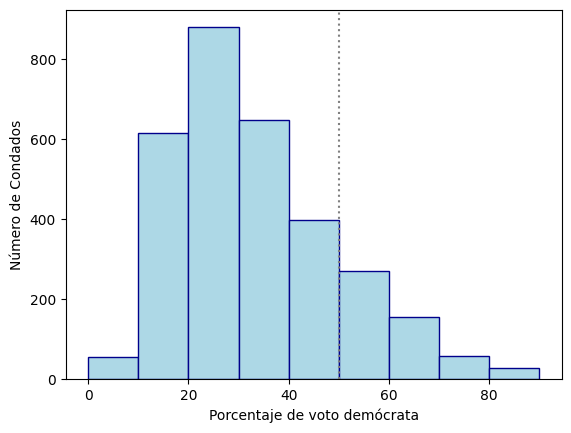

In [6]:
dat['pct_D']=dat['votes_D_2020']/dat['votes_total_2020']*100
#histograma
fig=plt.figure()
ax=fig.add_subplot(111)

bins=np.arange(0,100,10)
n,bins,patches=ax.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
ax.set_xlabel('Porcentaje de voto demócrata')
ax.set_ylabel('Número de Condados')
ax.axvline(x=50,ls=':',color='gray')

De acuerdo al gráfico, la primera conclusión es que más condados de EEUU votaron por Trump que por el actual presidente Biden.¿Cómo se explica entonces la victoria demócrata?

In [7]:
counties_D=dat[dat['pct_D']>=50.0]
counties_R=dat[dat['pct_D']<50.0]
print(len(counties_R),len(counties_D),len(dat))

2599 513 3112


**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos sino que los agrupamos en bins, y por lo tanto, perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

55


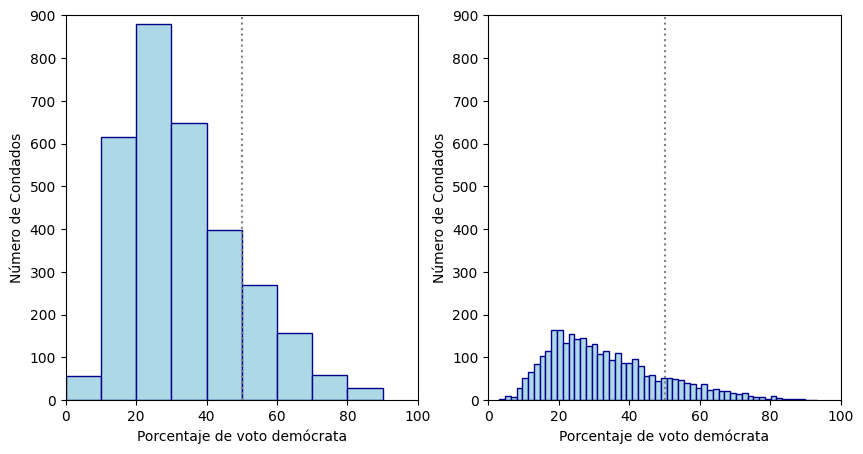

In [8]:
#Notar las diferencias de binning
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins=np.arange(0,100,10)
nbins=int(np.sqrt(len(dat)))
print(nbins)
_=ax1.hist(dat['pct_D'],bins=bins,histtype='bar',ec='darkblue',fc='lightblue')
_=ax2.hist(dat['pct_D'],bins=nbins,histtype='bar',ec='darkblue',fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50,ls=':',color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)


Para evitar sesgos de bias y pérdidas de información al agrupar los datos, una buena alternativa de exploración gráfica es la **función de distribución acumulada empírica (FDAe)**, donde:
- `Eje x:`la cantidad medida
- `Eje y:` fracción de datos que tienen un valor menor al correspondiente valor `x`.

Para construirla, ordenamos los datos `x`, y construimos un vector `y` de la siguiente forma:

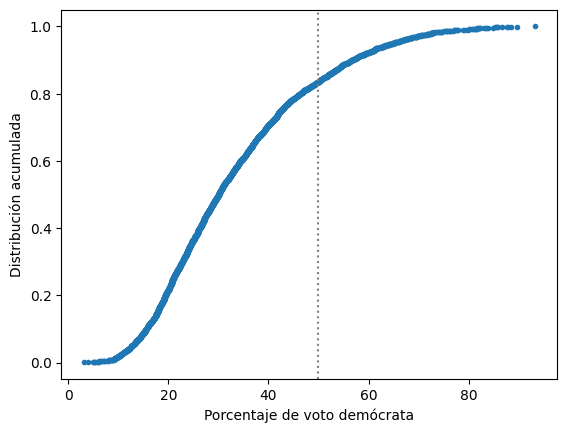

In [9]:
n=len(dat)
x=np.sort(dat['pct_D'])
y=np.arange(1,len(x)+1)/len(x)

plt.plot(x,y,marker='.',ls='none')
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

Podemos decir por ejemplo, que aproximadamente el 80% de los condados fue ganado por el candidato republicano, ya que tienen un porcentaje de voto demócrata menor al 50%.

La FDAe también es útil para comparar distribuciones. Por ejemplo, podemos comparar las distribuciones en los estados que definieron la elección del 2020: Arizona, Pensylvannia, Michigan, Georgia y Wisconsin.

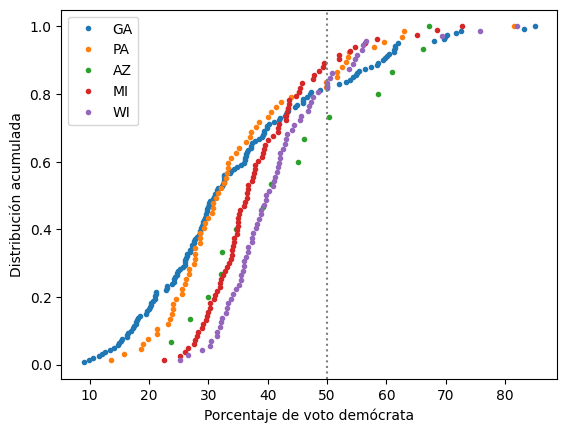

In [10]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

swing=['GA','PA','AZ','MI','WI',]

for state in swing:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

¿Qué estados tienen mayores y menores fracciones de condados ganados por Biden?

#### 3.2.2 Estadísticas de Resumen.

Los histogramas y FDAe entregan un resumen efectivo de los datos, pero puede ser de utilidad resumirlos aún más en algunas estadísticas numéricas, como por ejemplo: 

- **Media** (`np.mean()`): es la suma de todos los valores de los datos, dividida por el número de datos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 

 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


In [11]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

Covarianza: 1529.2228630936759
Pearson: 0.7003677095910197


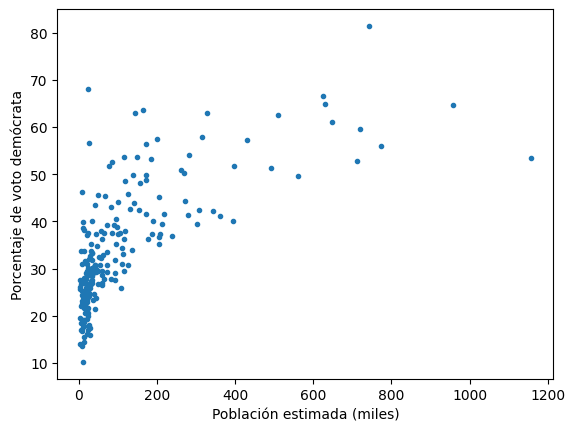

In [12]:
#Análisis de covarianza: % votos demócratas y cantidad total de votantes en swing states
swing=['PA','OH','FL']

dat_swing=dat[dat['state'].isin(swing)]

x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']

cov=np.cov(x,y)
print('Covarianza:',cov[0,1])

pearson=np.corrcoef(x,y)
print('Pearson:',pearson[0,1])

#scatter plot:
_=plt.plot(x,y,'.')
_=plt.xlabel('Población estimada (miles)')
_=plt.ylabel('Porcentaje de voto demócrata')

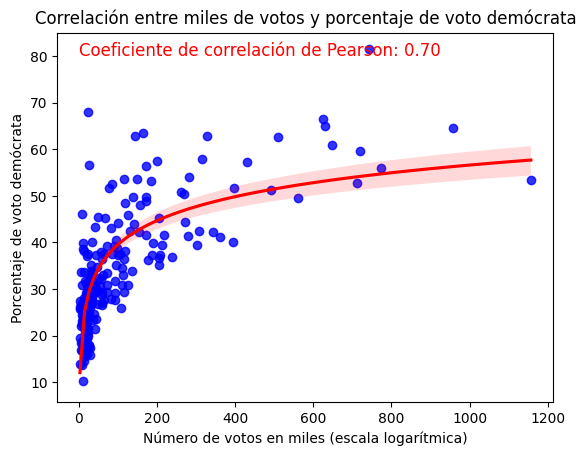

In [13]:
import seaborn as sns

swing=['PA','OH','FL']
dat_swing=dat[dat['state'].isin(swing)]

x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']

cov=np.cov(x,y)
pearson=np.corrcoef(x,y)

sns.regplot(x=x, y=y, logx=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Número de votos en miles (escala logarítmica)')
plt.ylabel('Porcentaje de voto demócrata')
plt.title('Correlación entre miles de votos y porcentaje de voto demócrata')
plt.text(1, 80, f'Coeficiente de correlación de Pearson: {pearson[0,1]:.2f}', fontsize=12, color='red')
plt.show()

La función `ns.regplot()` de la biblioteca Seaborn se utiliza para crear un gráfico de dispersión con una línea de regresión. El parámetro `logx=True` se utiliza para indicar que el eje x debe tener una escala logarítmica. La función `plt.text()` se utiliza para añadir el coeficiente de correlación de Pearson como un texto en el gráfico.

### 3.3 Estimación de Parámetros.

Supongamos un caso muy simple en que podemos modelar la relación entre dos variables mediante una regresión lineal de la forma:

$$ y=ax+b $$

donde $a$ y $b$ son parámetros a estimar.

Por ejemplo, podemos modelar la relación entre el porcentaje de voto demócrata, y la cantidad total de votos por condado

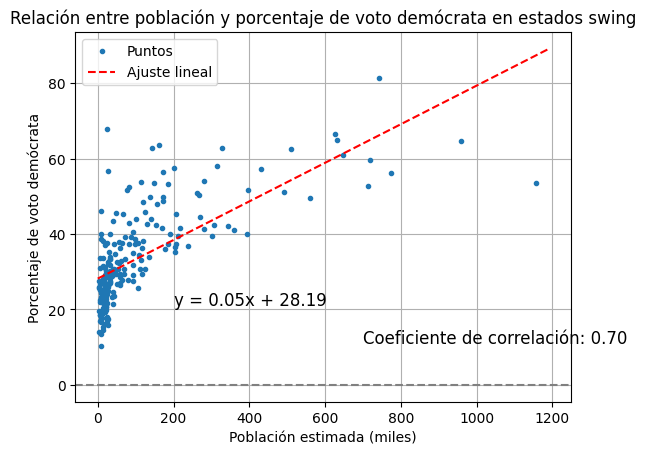

In [14]:
# Ajuste lineal y gráfico de dispersión
a, b = np.polyfit(x, y, 1)
xf = np.arange(0, 1200, 10)
yf = a * xf + b
plt.plot(x, y, '.', label='Puntos')
plt.plot(xf, yf, '--', color='red', label='Ajuste lineal')

# Título, leyenda y etiquetas de los ejes
plt.title('Relación entre población y porcentaje de voto demócrata en estados swing')
plt.xlabel('Población estimada (miles)')
plt.ylabel('Porcentaje de voto demócrata')
plt.legend()

# Coeficiente de correlación
pearson = np.corrcoef(x, y)[0, 1]
plt.text(700, 10, f'Coeficiente de correlación: {pearson:.2f}', fontsize=12, ha='left', va='bottom')
plt.axhline(y=0, color='gray', linestyle='--')

# Ecuación de la recta
plt.text(200, 20, f'y = {a:.2f}x + {b:.2f}', fontsize=12, ha='left', va='bottom')

# Cuadrícula de fondo
plt.grid(True)

# Mostrar el gráfico
plt.show()


### 3.4 Boostrapping.
 
Veamos primero cómo generar remuestreos y réplicas de bootstrapping usando `numpy.random`. Para ello, consideremos los datos de fracción de voto demócrata para todos los condados de EEUU, y su distribución acumulada.

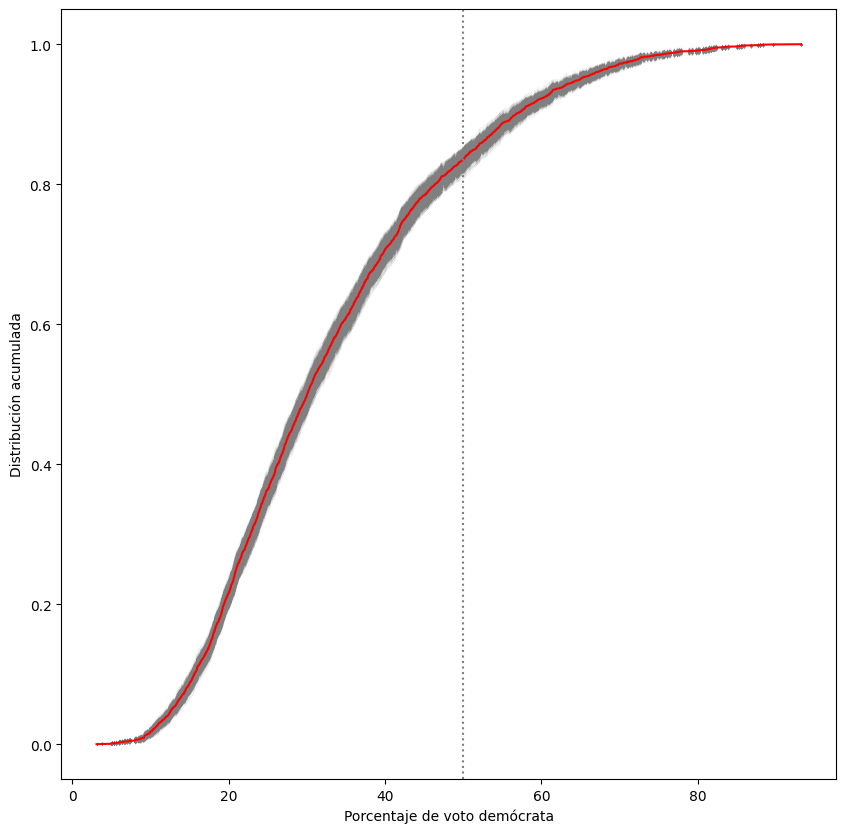

In [15]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

nsamples=1000
xb=dat['pct_D']
plt.figure(figsize=(10,10))

for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    x, y = fdae(bs_sample)
    _ = plt.plot(x, y, marker='.', markersize=0.2,linestyle='none',color='gray', alpha=0.1)
    

x, y = fdae(xb)
_ = plt.plot(x, y, '-', color='red')
 
    
plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')


### Bootstrap no paramétrico.

Suponga ahora que por alguna inesperada razón el candidato perdedor logra anular al elección, y ésta tiene que repetirse (bajo las mismas condiciones iniviales). ¿Qué podemos decir del resultado esperado para esta nueva "medición"?

0.1648457583547558
IC (95%): [0.15230559 0.17737789]


(0.0, 110.0)

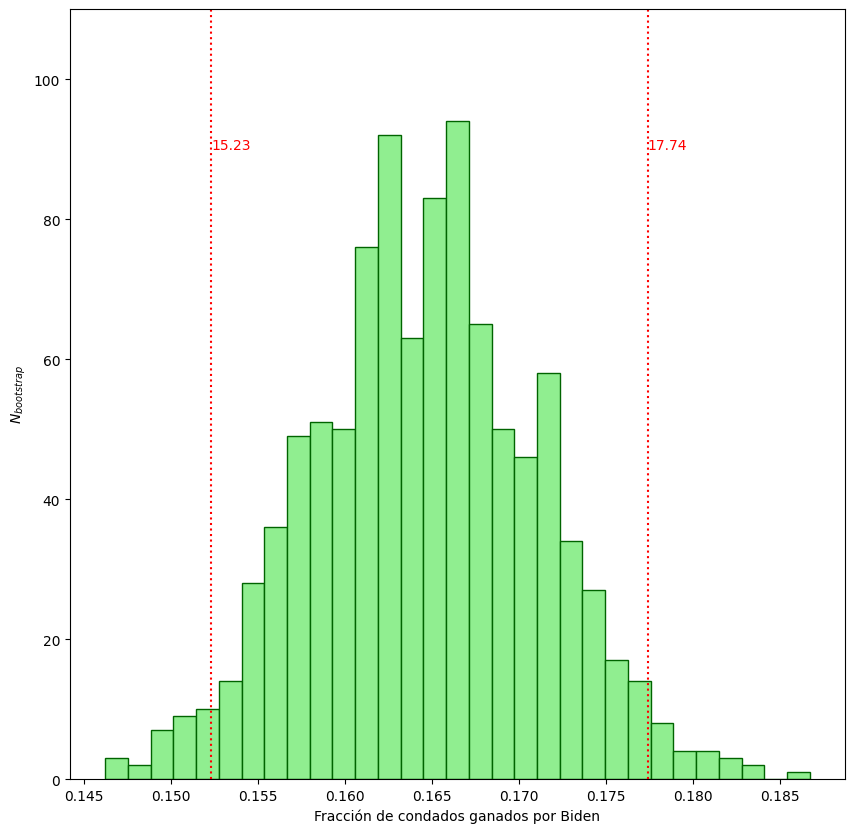

In [16]:
#qué fracción de los condados serían ganados por demócratas si repetimos la elección bajo las mismas condiciones?

nsamples=1000
xb=dat['pct_D']

#estadistica promedio para los datos
counties_D=xb[xb>=50.0]
frac_D=len(counties_D)/len(dat)
print(frac_D)
plt.figure(figsize=(10,10))

frac_D_b=np.empty(nsamples)
for ns in range(nsamples):
    bs_sample=np.random.choice(xb,size=len(xb))
    counties_D_b=bs_sample[bs_sample>=50.0]
    frac_D_b[ns]=len(counties_D_b)/len(bs_sample)


_ = plt.hist(frac_D_b,bins=int(np.sqrt(nsamples)),ec='darkgreen',fc='lightgreen')
 
    
IC=np.percentile(frac_D_b, [2.5, 97.5])
                 
print('IC (95%):',IC)     

plt.xlabel('Fracción de condados ganados por Biden')
plt.ylabel(r'$N_{bootstrap}$')
#plt.axvline(x=frac_D,ls='--',color='k')
plt.axvline(x=IC[0],ls=':',color='r')
plt.axvline(x=IC[1],ls=':',color='r')
plt.text(IC[0],90,'%.2f'%(IC[0]*100),color='r',fontsize=10)
plt.text(IC[1],90,'%.2f'%(IC[1]*100),color='r',fontsize=10)

#plt.fill_betweenx([0,110],0.14,IC[0],alpha=0.2,color='r')
#plt.fill_betweenx([0,110],IC[1],0.2,alpha=0.2,color='r')
plt.ylim(0,110)


A partir de los resultados de la votación del 3/11/2020, podemos *inferir* que si la elección se repitiera (en las mismas condiciones), Biden ganaría entre un 15.1% y 17.7% de los condados, con 95% de confiabilidad.


### 3.5 Boostrapping de a Pares e Intervalos de Confiabilidad.

¿Qué pasaría si repetimos la elección, bajo las mismas condiciones? ¿Cómo cambiarían los parámetros de la función lineal estimada en el punto 3.3 (% de voto demócrata vs. total de votos en FL, OH y PA)? 

Usando bootstrapping, podemos obtener intervalos de confiabilidad para $a, b$: generamos colecciones de pares de datos, y obtenemos la distribución de los parámetros obtenidos.

a: IC (95%): [0.04089896 0.06707548]
b: IC (95%): [26.53770924 29.71152043]


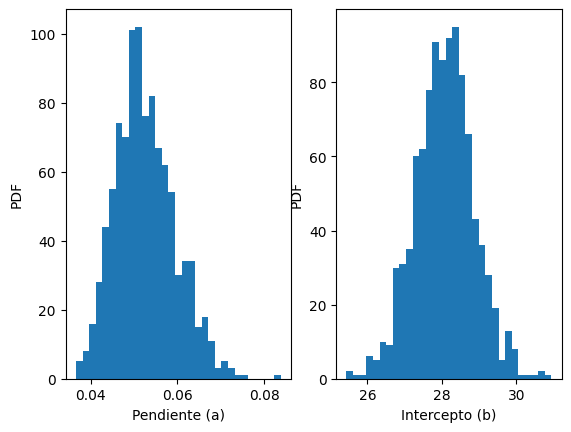

In [17]:
x=dat_swing['votes_total_2020']/1000
y=dat_swing['pct_D']
x=x.to_numpy()
y=y.to_numpy()
#Indices
inds=np.arange(len(x))

#numero de muestras
size=1000 

# Initializar replicas: bs_slope_reps, bs_intercept_reps
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

# Generar replicates
for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

print('a: IC (95%):',np.percentile(bs_slope_reps, [2.5, 97.5]))     
print('b: IC (95%):',np.percentile(bs_intercept_reps, [2.5, 97.5]))     
  
# Plot the histogram

f, (ax1, ax2) = plt.subplots(1, 2)

nbins=int(np.sqrt(size))
ax1.hist(bs_slope_reps, bins=nbins)
ax1.set_xlabel('Pendiente (a)')
ax1.set_ylabel('PDF')

ax2.hist(bs_intercept_reps, bins=nbins)
ax2.set_xlabel('Intercepto (b)')
ax2.set_ylabel('PDF')

plt.show()


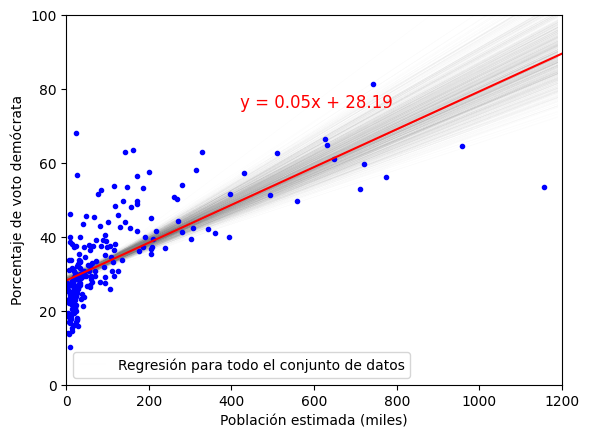

In [18]:
# Dibujar líneas de regresión con diferentes valores de pendiente e intersección
xf = np.arange(0, 1200, 10)
for a, b in zip(bs_slope_reps, bs_intercept_reps):
    plt.plot(xf, a * xf + b, lw=0.1, alpha=0.1, color='gray')

# Dibujar puntos originales
plt.plot(x, y, '.', color='blue')

# Calcular y dibujar la línea de regresión para todo el conjunto de datos
p = np.polyfit(x, y, 1)
xf = np.linspace(0, 1200, 100)
yf = np.polyval(p, xf)
plt.plot(xf, yf, '-', color='red')

# Ajustar los ejes y agregar etiquetas
plt.ylim(0, 100)
plt.xlim(0, 1200)
plt.xlabel('Población estimada (miles)')
plt.ylabel('Porcentaje de voto demócrata')

# Agregar leyenda
plt.legend(['Regresión para todo el conjunto de datos'])

# Imprimir los coeficientes de la recta de regresión para todo el conjunto de datos
eq_text = 'y = {:.2f}x + {:.2f}'.format(p[0], p[1])
plt.text(420, 75, eq_text, fontsize=12, color='red')

plt.show()


### 3.6 Testeo de Hipótesis.

En el análisis anterior asumimos un modelo lineal para la generación de datos, y estimamos los parámetros del modelo junto con sus intervalos de confiabilidad. Pero, ¿cómo evaluamos si el modelo es una descripción razonable de los datos?

Por ejemplo, supongamos la siguiente hipótesis: **dos estados vecinos como Michigan y Wisconsin, tienen la misma distribución de probabilidad de votos a nivel de condado.**
 
Esta es nuestra **hipótesis nula**, y contamos con datos para testearla (validar si es verdadera). En concreto, necesitamos evaluar qué tan razonables son los datos observados, asumiendo que la hipótesis es verdadera.

Podemos comenzar por comparar la distribución acumulada y estadísticas de resumen para cada estado.

MI, media:38.78, mediana:36.57, std:9.62, len:83
WI, media:42.03, mediana:39.97, std:10.31, len:72
Diferencia en media: 3.26
Diferencia en madiana: 3.40
Diferencia en desviación estándar: 0.69


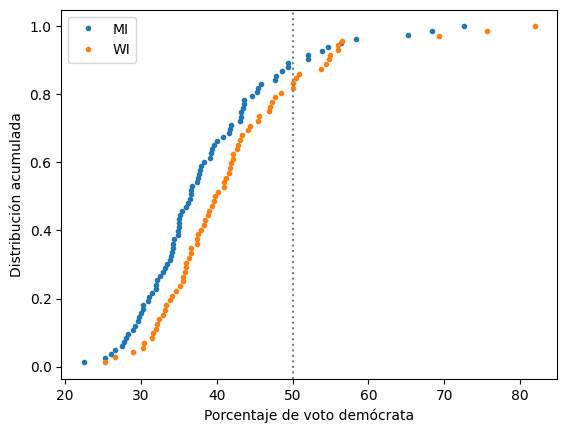

In [19]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

test=['MI','WI']

for state in test:
    dats=dat[dat['state']==state]
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=state)
    plt.legend()
    
    print('%s, media:%.2f, mediana:%.2f, std:%.2f, len:%.d'%(state,dats['pct_D'].mean(),dats['pct_D'].median(),dats['pct_D'].std(),len(dats['pct_D'])))
    
mi_dats = dat[dat['state'] == 'MI']
wi_dats = dat[dat['state'] == 'WI']

diff_mean = mi_dats['pct_D'].mean() - wi_dats['pct_D'].mean()
diff_median = mi_dats['pct_D'].median() - wi_dats['pct_D'].median()
diff_std = mi_dats['pct_D'].std() - wi_dats['pct_D'].std()

print('Diferencia en media: %.2f' % abs(diff_mean))
print('Diferencia en madiana: %.2f' % abs(diff_median))
print('Diferencia en desviación estándar: %.2f' % abs(diff_std))

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')



¿Es suficiente este análisis para llegar a una conclusión?

Para testear la hipótesis podemos simular cómo serían los datos observados si las tendencias de voto en ambos estados estuvieran idénticamente distribuidas.

Para ello, reordenamos los datos de manera que los datos de MI y WI sean indistinguibles entre sí. Es decir, como si provinieran de una única población donde el estado no importa. Esto se denomina `permutaciones`, y está implementado en la siguiente función:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html

Luego, etiquetamos los primeros datos como 'MI', y los siguientes como 'WI', y calculamos su distribución.

83 72


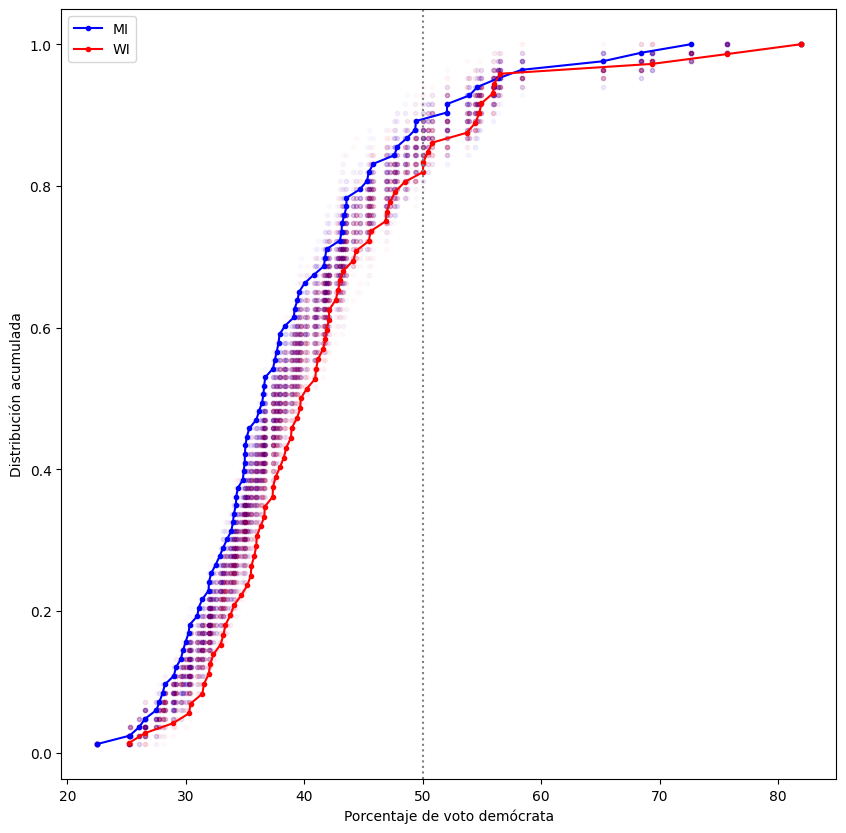

In [20]:
"""Generar una permutacion de dos datasets"""
def permutation_sample(data1, data2):

    #datos concatenados
    data = np.concatenate((data1, data2))

    # permutacion
    permuted_data = np.random.permutation(data)

    #muestras permutadas
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data2):]

    return perm_sample_1, perm_sample_2


#datos por estado
pct_D_MI=dat[dat['state']=='MI']['pct_D']
pct_D_WI=dat[dat['state']=='WI']['pct_D']
print(len(pct_D_MI),len(pct_D_WI))
#generamos n permutaciones
nperm=100
plt.figure(figsize=(10,10))
for n in range(nperm):
    perm1,perm2=permutation_sample(pct_D_MI,pct_D_WI)
    x,y=fdae(perm1)
    plt.plot(x,y,marker='.',ls='none',color='blue',alpha=0.02)
    
    x,y=fdae(perm2)
    plt.plot(x,y,marker='.',ls='none',color='red',alpha=0.02)

#graficamos las distribuciones originales de cada estado
x,y=fdae(pct_D_MI)
plt.plot(x,y,marker='.',ls='-',label='MI',color='blue')

x,y=fdae(pct_D_WI)
plt.plot(x,y,marker='.',ls='-',label='WI',color='red')
plt.legend()

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')



Ahora que sabemos cómo simular la hipótesis nula usando permutaciones, podemos testearla. Ello implica evaluar si los datos observados son consistentes asumiendo que la hipótesis es verdadera. ¿Cómo hacemos esto cuantitativamente?

Para evaluar la hipótesis, necesitamos una **estadística de prueba**. Es decir, una cantidad que podemos calcular a partir de las observaciones, y de los datos simulados bajo la hipótesis nula. Esta estadística tiene que ser pertinente a la hipótesis que estamos testeando.

En este caso, la hipotésis nula es: 
> $H_0$: los dos estados (WI y MI) tienen la misma distribución de voto demócrata. 

Es decir, su media debería ser idéntica, o *la diferencia entre sus medias* debería ser 0. Por lo tanto, elegimos como estadística de prueba esta diferencia.

Luego, para evaluar si la estadística de prueba (en este caso, la diferencia entre medias) observada es consistente con la hipótesis nula, analizamos la distribución de réplicas y calculamos el **valor-p**.

> El valor p se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

Si el valor p cumple con la condición de ser menor que un nivel de significancia impuesto arbitrariamente, este se considera como un resultado estadísticamente significativo y, por lo tanto, permite *rechazar la hipótesis nula*. Típicamente, se rechaza la hipótesis nula cuando $p<0.05$.


![imagen.png](attachment:imagen.png)



Diferencia promedio observada:3.26
valor-p = 0.0282


Text(0, 0.5, 'N')

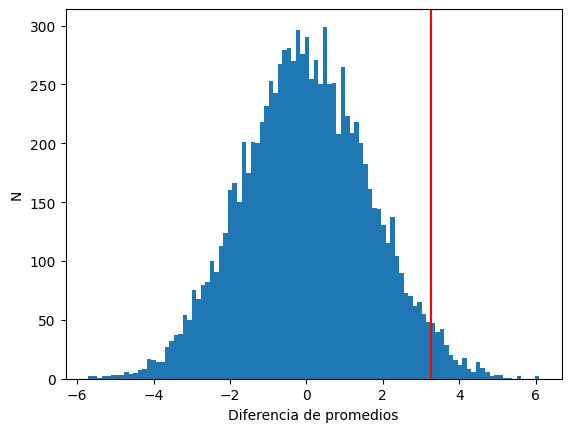

In [21]:
"""Generate multiples replicas de la diferencia media para las permutaciones."""
def perm_reps(data_1, data_2, size=1):

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates

#observaciones (MI-WI)
obs_diff=pct_D_WI.mean()-pct_D_MI.mean()

print(r'Diferencia promedio observada:%.2f'%obs_diff)

#permutaciones
nperm=10000
perm_replicates =perm_reps(pct_D_WI,pct_D_MI, size=nperm)

#valor-p
pval=np.sum(perm_replicates>=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

El valor p obtenido indica que hay sólo un 2.2% de probabilidad de obtener las diferencia media observada (3.26%) bajo la hipótesis nula de que las distribuciones de voto demócrata en MI y WI son equivalentes. Es decir, **se rechaza la hipótesis nula**: MI y WI *no* tienen una diferencia de media significativamente igual a 0, por lo tanto sus distribuciones no son similares.

## 4. Trabajo Individual

**1.** Elija dos estados de EEUU y compare la distribución de votos republicanos y demócratas a través de estadísticas descriptivas. Elabore también un gráfico de caja, y comente sobre las similitudes y diferencias que puede inferir a partir del análisis exploratorio gráfico y cuantitativo.<br>


**Se eligió el estado de California y Texas**

In [22]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [23]:
dat

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2004,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,10520,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913,12.726402
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,16693,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649,15.937970
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,24135,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438,14.611919
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,12875,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537,10.614525
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,12269,11693,10859,12040,NaN,NaN,2197,9466,1.043854,16.597708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,56041,100,0,2020-11-03,FIPSCode,presidential,WY,R,7496,...,8081,8418,8539,8470,NaN,NaN,1202,6154,1.102479,17.037910
3108,3108,56003,100,0,2020-11-03,FIPSCode,presidential,WY,R,4806,...,5283,5341,5324,5317,NaN,NaN,604,4067,1.074666,13.790690
3109,3109,56023,100,0,2020-11-03,FIPSCode,presidential,WY,R,8643,...,7914,8615,8618,8875,NaN,NaN,1105,6779,1.170704,14.523580
3110,3110,56031,100,0,2020-11-03,FIPSCode,presidential,WY,R,3898,...,4574,4597,4531,4529,NaN,NaN,719,3437,1.082358,18.155855


In [24]:
# estados California y Texas
votes_R_CA=dat[dat['state']=='CA']['votes_R_2020']
votes_R_TX=dat[dat['state']=='TX']['votes_R_2020']
votes_D_CA=dat[dat['state']=='CA']['votes_D_2020']
votes_D_TX=dat[dat['state']=='TX']['votes_D_2020']
print(len(votes_R_CA),len(votes_R_TX))

58 254


In [25]:
votes_CA = pd.concat([votes_D_CA, votes_R_CA], axis=1)
votes_TX = pd.concat([votes_D_TX, votes_R_TX], axis=1)

In [26]:
ca_stats = votes_CA[['votes_D_2020', 'votes_R_2020']].describe()
tx_stats = votes_TX[['votes_D_2020', 'votes_R_2020']].describe()
print('California:')
print(ca_stats)
print("Votos_D: ",votes_D_CA.sum(),"Votos_R: ",votes_R_CA.sum())
print('\nTexas:')
print(tx_stats)
print("Votos_D: ",votes_D_TX.sum(),"Votos_R: ",votes_R_TX.sum())

California:
       votes_D_2020  votes_R_2020
count  5.800000e+01  5.800000e+01
mean   1.915560e+05  1.035591e+05
std    4.353692e+05  1.953249e+05
min    4.760000e+02  2.440000e+02
25%    9.706250e+03  1.327275e+04
50%    4.940400e+04  2.711450e+04
75%    1.541942e+05  9.750350e+04
max    3.028885e+06  1.145530e+06
Votos_D:  11110250 Votos_R:  6006429

Texas:
        votes_D_2020   votes_R_2020
count     254.000000     254.000000
mean    20705.220472   23190.342520
std     86488.620588   64410.920025
min         4.000000      60.000000
25%       422.000000    1854.000000
50%      1598.000000    5643.500000
75%      5750.750000   16339.250000
max    918193.000000  700630.000000
Votos_D:  5259126 Votos_R:  5890347


En el  estados de California ganaron los Demócratas de forma amplia y en Texas los Republicanos de forma ajustada, tenemos 58 contados en el estado de Californa y 254 contados en el estado de Texas. 

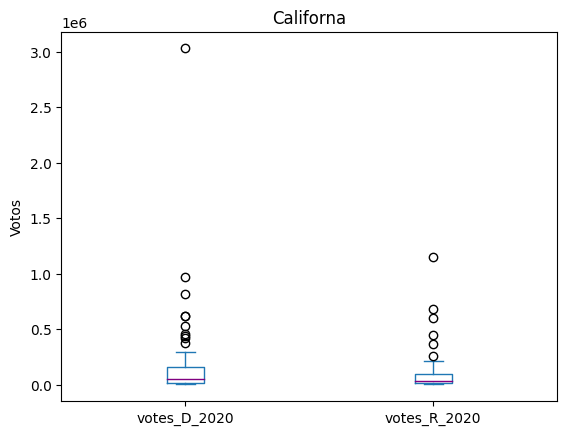

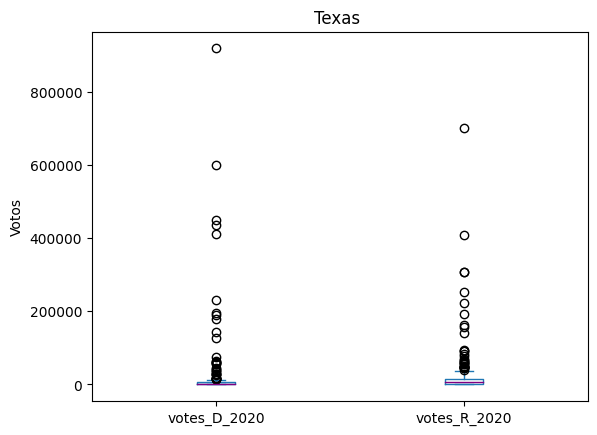

In [27]:
votes_CA[['votes_D_2020', 'votes_R_2020']].plot(kind='box',medianprops={"linewidth":1.0, "color":"purple"})
plt.title('Californa')
plt.ylabel('Votos')
plt.show()

votes_TX[['votes_D_2020', 'votes_R_2020']].plot(kind='box', medianprops={"linewidth":1.0, "color":"purple"})
plt.title('Texas ')
plt.ylabel('Votos')
plt.show()

En California, la mediana de votos demócratas es mayor que la mediana de votos republicanos, lo que indica que hubo más votos demócratas en el estado. En Texas, la mediana de votos republicanos es mayor que la mediana de votos demócratas, lo que indica que hubo más votos republicanos en el estado. Además, tanto en California como en Texas, hay valores atípicos lo que indica una gran variabilidad en los votos.
En Texas se tiene cajas achatadas lo que indica que los valores están muy concentrados alrededor de la mediana

**2.** A partir de los datos entregados, estudie la posible correlación entre la fracción de votos republicanos (o demócratas) y alguna otras de las variables incluidas en la base de datos. Puede trabajar con todos los estados, o con alguna selección de ellos. Para este estudio, se requiere:<br>

a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>
b) Plantear una hipótesis que refleje esta correlación.<br>
c) Diseñar y realizar el test de hipótesis.<br>
d) Concluir acerca de la validez y significancia de la correlación identificada.<br>

**a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>**
**Votos republicanos y la tasa de desempleo en cada estado**

Explorar la posible correlación entre los votos republicanos y la tasa de desempleo en cada estado. Podríamos suponer que los estados con una tasa de desempleo más alta tienden a votar más por el partido demócrata, ya que los votantes pueden culpar al partido republicano por las condiciones económicas adversas. Por otro lado, los estados con una tasa de desempleo más baja pueden votar más por el partido republicano, pues los votantes pueden estar satisfechos con la economía del estado.  Entre el 2017 y 2021 gobernó Donald Trum quien es republicano.

De la tabla DAT vamos a trabajar con las columanas: Desempleados, Fuerza laboral y Tasa de desempleo, para ambos estados (California y Texas)

In [28]:
# CALIFORNIA
# Columna de votos_d votos_r  desempleados, fuerza laboral tasa de desempleo 
unemployment_CA=dat[dat['state']=='CA']['Unemployment']
labor_force_CA=dat[dat['state']=='CA']['Labor Force']
unemployment_rate_CA=dat[dat['state']=='CA']['Unemployment Rate']
votes_unemployment_CA = pd.concat([votes_D_CA, votes_R_CA, unemployment_CA, labor_force_CA, unemployment_rate_CA], axis=1) # california
# TEXAS
unemployment_TX=dat[dat['state']=='TX']['Unemployment']
labor_force_TX=dat[dat['state']=='TX']['Labor Force']
unemployment_rate_TX=dat[dat['state']=='TX']['Unemployment Rate']
votes_unemployment_TX = pd.concat([votes_D_TX, votes_R_TX, unemployment_TX, labor_force_TX,unemployment_rate_TX], axis=1) # TEXAS


Graficamos el valor de *tasa de desempleo* VS *el contado*

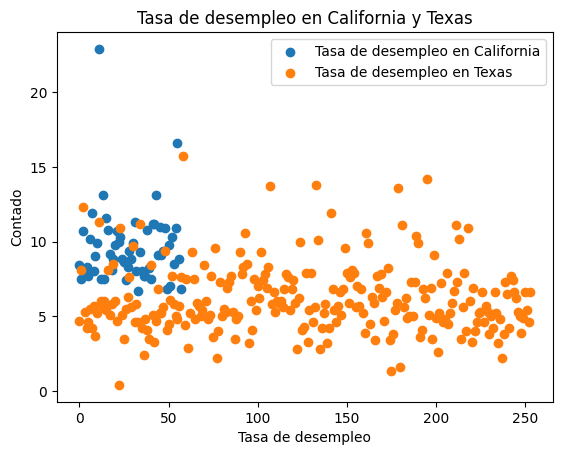

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.scatter(range(len(unemployment_rate_CA)), unemployment_rate_CA, label='Tasa de desempleo en California')
ax.scatter(range(len(unemployment_rate_TX)), unemployment_rate_TX, label='Tasa de desempleo en Texas')

ax.set_xlabel('Tasa de desempleo')
ax.set_ylabel('Contado')

ax.set_title('Tasa de desempleo en California y Texas')
ax.legend()

plt.show()

In [34]:
varianza_desempleados_CA = np.var(unemployment_rate_CA)
varianza_desempleados_TX = np.var(unemployment_rate_TX)
print("Varianza de la Tasa de desempleo en California: ",varianza_desempleados_CA,"\nVarianza de la Tasa de desempleo en Texas: ",varianza_desempleados_TX  )

Varianza de la Tasa de desempleo en California:  6.38205707491082 
Varianza de la Tasa de desempleo en Texas:  5.379072478144957


Se observa que la tasa de desempleo en California va desde 7 hasta 28 aproximadamente esta es  mas diversa,  y se valida porque tiene un valor mayor de varianza , en Texas los valores de desempleo van desde cercanos a 1 hasta 16.

Recordar que la tasa de desempleados se calcula de la siguiente manera:

$Tasa \space de \space desempleo = (Numero \space de \space desempleados / Fuerza \space laboral \space total) x 100  $



In [30]:
media_desempleados_CA = np.mean(unemployment_rate_CA)
media_desempleados_TX = np.mean(unemployment_rate_TX)
mediana_desempleados_CA = np.median(unemployment_rate_CA)
mediana_desempleados_TX = np.median(unemployment_rate_TX)
print("        Tasa de desempleo California  Tasa de desempleo Texas")
print("Media                {:<18.6f} {:<18.6f}".format(media_desempleados_CA, media_desempleados_TX))
print("Mediana              {:<18.6f} {:<18.6f}".format(mediana_desempleados_CA, mediana_desempleados_TX))

        Tasa de desempleo California  Tasa de desempleo Texas
Media                9.596552           6.170866          
Mediana              9.100000           5.700000          


Se ha realializo el calculo para obtener la Tasa de desempleo en los estados en base a las tasas de los condados. Se empleó dos metricas Media (es la suma de todos los valores de los datos, dividida por el número de datos) y  Mediana (es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers). Se observa que Texas tiene el menor valor de Tasa de desempleo, entonces debería tener menores votos de demócratas y mas de republicanos, y según los datos de las votaciones es correcto pues acá ganaron los republicanos. Pero esto no puede ser del todo cierto pues se podría deber a otros factores políticos y sociales, se debe evaluar el grado de correlación para hacer una afirmación.

**b) Hipótesis que refleje esta correlación:**

*Hipótesis nula:* Hay correlación negativa entre la fracción de votos republicanos y la tasa de desempleo en cada estado. (mayor tasa menores votos republicanos y menor tasa hay mayores votos)


**c) Diseño y realización del test de hipótesis:**

Se podría utilizar una prueba de correlación de Pearson, que mide la fuerza de la correlación lineal entre dos variables continuas. Se podría calcular la correlación entre la fracción de votos republicanos y la tasa de desempleo en cada estado, y evaluar si el valor obtenido es significativo. Si el valor obtenido es significativo, se podría concluir que existe una correlación positiva entre las variables.

In [31]:
correlation_CA = votes_unemployment_CA['votes_R_2020'].corr(votes_unemployment_CA['Unemployment Rate'])
print("Correlación entre fracción de votos republicanos y tasa de desempleo en California: ", correlation_CA)

Correlación entre fracción de votos republicanos y tasa de desempleo en California:  0.3473095384153334


Un valor de 0.34 indica una correlación positiva moderada entre dos variables.

In [32]:
correlation_TX = votes_unemployment_TX['votes_R_2020'].corr(votes_unemployment_TX['Unemployment Rate'])
print("Correlación entre fracción de votos republicanos y tasa de desempleo en Texas: ", correlation_TX)

Correlación entre fracción de votos republicanos y tasa de desempleo en Texas:  0.08644507304062357


Un valor de 0.086 indica una correlación positiva débil entre dos variables.

Para evaluar si la hipotesis nula es verdadera emplearemos el p valor (p_value)con un nivel de significancia (α) = 0.05. 

In [33]:
# Realizar el test de hipótesis utilizando la función pearsonr de scipy.stats.
from scipy.stats import pearsonr
print("CALIFORNIA")
r, p_value = pearsonr(votes_unemployment_CA['votes_R_2020'], votes_unemployment_CA['Unemployment Rate'])
if p_value < 0.05:
    print("El resultado es significativo, existe una correlación negativa entre fracción de votos republicanos y tasa de desempleo.")
else:
    print("El resultado no es significativo, no hay suficiente evidencia para afirmar que existe una correlación.")

#votes_unemployment_TX['votes_R_2020'].corr(votes_unemployment_TX['Unemployment Rate']

CALIFORNIA
El resultado es significativo, existe una correlación negativa entre fracción de votos republicanos y tasa de desempleo.


In [34]:
p_value

0.007558972543190146

In [35]:
# Realizar el test de hipótesis utilizando la función pearsonr de scipy.stats.
from scipy.stats import pearsonr
print("TEXAS")
r, p_value = pearsonr(votes_unemployment_TX['votes_R_2020'], votes_unemployment_TX['Unemployment Rate'])
if p_value < 0.05:
    print("El resultado es significativo, existe una correlación negativa entre fracción de votos republicanos y tasa de desempleo.")
else:
    print("El resultado no es significativo, no hay suficiente evidencia para afirmar que existe una correlación.")

#votes_unemployment_TX['votes_R_2020'].corr(votes_unemployment_TX['Unemployment Rate']

TEXAS
El resultado no es significativo, no hay suficiente evidencia para afirmar que existe una correlación.


In [41]:
p_value

0.16960171981269387

**d) Conclusión acerca de la validez y significancia de la correlación identificada:**

En ninguna de los dos estados tenemos una correlación negativa (coeficiente menor que cero), se **rechazar la hipotesis nula y no se puede afirmar que haya una correlación negativa significativa entre las dos variables**.
Esto podría deverse a otros factores o variables que influyen en la relación entre ambas. Además, es importante considerar que los resultados obtenidos en este análisis estadístico no necesariamente reflejan la complejidad de las dinámicas políticas y sociales en cada estado, para un mayor análisis se pueden usar valores como el grado de educación, datos de otros años, ingresos económicos, etc.

**3.** Imagine que ud. trabaja en una empresa de e-commerce, que está testeando un nuevo diseño de página web. El objetivo es lograr un aumento en la tasa de conversión (porcentaje de usuarios que realiza una compra) de al menos un 2%.

Para el testeo, se diseña un experimento en base a dos grupos:

> Grupo control (A): se les muestra la página original.

> Grupo de tratamiento (B): se les muestra el nuevo diseño. 

Para cada grupo, se monitorea la actividad en la página web y se asigna una tasa de conversión de acuerdo a la siguiente regla: 

    0 - El usuario no compró el producto durante la sesión en la página web. 
    1 - El usuario si compró el producto durante la sesión en la página web. 

El experimento se desarrolla durante un mes, y para cada día se reporta la tasa de conversión promedio de cada grupo. Los datos están contenidos en el archivo `abtest.csv`.

Para este caso, diseñe e implemente un testeo A/B que permita determinar si el diseño de la nueva página es o no efectivo.

### Hipótesis:
**Hipótesis nula:** Es efectivo el nuevo diseño de la página web.


In [53]:
dat_ab=pd.read_csv('/content/drive/MyDrive/INTRODUCCION A LA CIENCIA DE DATOS/TALLER 1/abtest.csv')

In [36]:
dat_ab=pd.read_csv('abtest.csv')

Separar los datos en dos grupos: tasa de conversión pagina original (conversion_A) y tasa de conversión nuevo diseño (conversion_B)

In [37]:
conversion_A = dat_ab['Conversion_A']
conversion_B= dat_ab['Conversion_B']

Calcular la tasa de conversión promedio para cada grupo:



In [38]:
conversion_rate_a = conversion_A.mean()
conversion_rate_b = conversion_B.mean()

print("Tasa de conversión promedio para el grupo A:", conversion_rate_a)
print("Tasa de conversión promedio para el grupo B:", conversion_rate_b)

Tasa de conversión promedio para el grupo A: 0.162
Tasa de conversión promedio para el grupo B: 0.19333333333333336


Observamos que el grupo B, tiene una mayor tasa promedio

Realizamos la comprobación de hipotesis, la mejora mínima deseada del 2% y nivel de significancia del 0.05.

**Empleando la librería SCIPY y función STATS**

In [39]:
mejora_minima = 0.02  # 2% expresado como decimal
hipotesis = conversion_rate_b <= conversion_rate_a * (1 + mejora_minima)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(conversion_B, conversion_A, equal_var=False)

if p_value < 0.05 and not hipotesis: # verificamos que le hipotesis_nula definida anteriormete sea falsa
    print("La diferencia en las tasas de conversión es significativa.")
else:
    print("No se encontró una diferencia significativa en las tasas de conversión.")



La diferencia en las tasas de conversión es significativa.


**Comprobacion con el algoritmo brindado en la clase**

In [40]:
#Calculate pooled standard error and margin of error
import math
import scipy.stats as st


conversions_control = conversion_A.sum()
total_users_control = conversion_A.count()

conversions_treatment = conversion_B.sum()
total_users_treatment = conversion_B.count()


prob_pooled = (conversions_control + conversions_treatment) / (total_users_control + total_users_treatment)

confidence_level = 0.05 #user defined, for a 95% confidence interval
practical_significance = 0.02 # 2%

se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / total_users_control + 1 / total_users_treatment))
z_score = st.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of conversions in the experiment and control groups
d_hat = (conversions_treatment / total_users_treatment) - (conversions_control / total_users_control)

#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error

if practical_significance < lower_bound:
    print("Se rechaza la hipótesis nula")
else: 
    print("No se rechaza la hipótesis nula")
    
print("La cota inferior del intervalo de confianza es: ", round(lower_bound * 100, 2), "%")
print("La cota superior del intervalo de confianza es: ", round(upper_bound * 100, 2), "%")

No se rechaza la hipótesis nula
La cota inferior del intervalo de confianza es:  -16.21 %
La cota superior del intervalo de confianza es:  22.48 %


Mediante los dos algoritmos se concluye que el **nuevo diseño es mas efectivo con la mejora mínima deseada del 2%**.
